In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

In [41]:
product = pd.read_csv('productdata.xlsx - Sheet1 (1).csv')

In [42]:
product

,PRODUCTID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCTTYPEID,ProductLength
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650.0,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755.0,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537.0,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996.0,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112.0,598.424000
...,...,...,...,...,...,...
3842,67078,Occupational Health and Safety: International ...,NaN,NaN,6232.0,598.000000
3843,653247,Le duel introuvable,NaN,NaN,1.0,539.369000
3844,1783479,"ArtToFrames 27x39 Inch Black Picture Frame, Th...",[Comes with 060 Plexi Glass and a a wire hangi...,This black satin frame is our favorite gallery...,1590.0,2900.000000
3845,770603,The Ascension of Isaiah: translated from the E...,NaN,NaN,6104.0,550.000000


In [43]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRODUCTID      3847 non-null   int64  
 1   TITLE          3847 non-null   object 
 2   BULLET_POINTS  2256 non-null   object 
 3   DESCRIPTION    1703 non-null   object 
 4   PRODUCTTYPEID  3669 non-null   float64
 5   ProductLength  3669 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 180.5+ KB


In [44]:
product.describe()

,PRODUCTID,PRODUCTTYPEID,ProductLength
count,3.847000e+03,3669.000000,3669.000000
mean,1.456557e+06,3932.736986,1150.529020
std,8.666684e+05,3970.908660,2665.897894
min,1.303000e+03,0.000000,1.000000
25%,6.922785e+05,154.000000,507.873000
50%,1.441218e+06,2879.000000,640.000000
75%,2.214798e+06,6337.000000,1023.622046
max,2.999397e+06,13330.000000,96000.000000


In [45]:
product.columns

Index(['PRODUCTID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION', 'PRODUCTTYPEID',
       'ProductLength'],
      dtype='object')

In [46]:
product.rename(columns={
    "PRODUCTID": "product_id",
    "TITLE": "title",
    "BULLET_POINTS": "bullet_points",
    "DESCRIPTION": "description",
    "PRODUCTTYPEID": "product_type_id",
    "ProductLength": "product_length"
}, inplace=True)

In [47]:
product

,product_id,title,bullet_points,description,product_type_id,product_length
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650.0,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755.0,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537.0,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996.0,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112.0,598.424000
...,...,...,...,...,...,...
3842,67078,Occupational Health and Safety: International ...,NaN,NaN,6232.0,598.000000
3843,653247,Le duel introuvable,NaN,NaN,1.0,539.369000
3844,1783479,"ArtToFrames 27x39 Inch Black Picture Frame, Th...",[Comes with 060 Plexi Glass and a a wire hangi...,This black satin frame is our favorite gallery...,1590.0,2900.000000
3845,770603,The Ascension of Isaiah: translated from the E...,NaN,NaN,6104.0,550.000000


In [48]:
product.duplicated().sum()

217

In [49]:
product.isnull().sum()

product_id            0
title                 0
bullet_points      1591
description        2144
product_type_id     178
product_length      178
dtype: int64

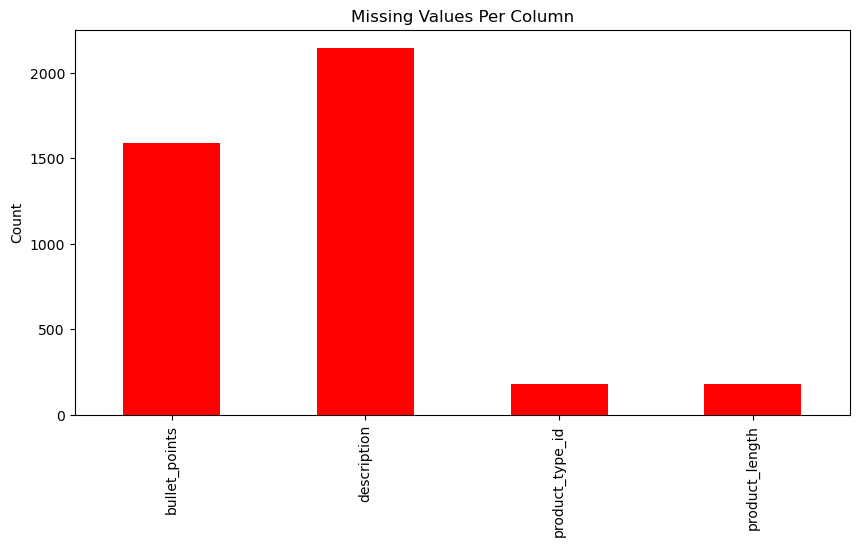

In [50]:
missing_values = product.isnull().sum()
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10, 5))
missing_values.plot(kind="bar", color="red")
plt.title("Missing Values Per Column")
plt.ylabel("Count")

# Save the figure
plt.savefig("missing_values_per_column.png", dpi=300)  
plt.show()


In [51]:
product['bullet_points'].fillna('No bullet points provided', inplace=True)
product['description'].fillna('No description available', inplace=True)

C:\Users\FOLAKEMI\AppData\Local\Temp\ipykernel_10904\4121650820.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product['bullet_points'].fillna('No bullet points provided', inplace=True)
C:\Users\FOLAKEMI\AppData\Local\Temp\ipykernel_10904\4121650820.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [52]:
product['product_length'] = product['product_length'].fillna(product['product_length'].mean())
product['product_type_id'] = product['product_type_id'].fillna(product['product_type_id'].mode()[0])

In [53]:
product

,product_id,title,bullet_points,description,product_type_id,product_length
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,No description available,1650.0,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",No description available,2755.0,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537.0,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996.0,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,No bullet points provided,No description available,6112.0,598.424000
...,...,...,...,...,...,...
3842,67078,Occupational Health and Safety: International ...,No bullet points provided,No description available,6232.0,598.000000
3843,653247,Le duel introuvable,No bullet points provided,No description available,1.0,539.369000
3844,1783479,"ArtToFrames 27x39 Inch Black Picture Frame, Th...",[Comes with 060 Plexi Glass and a a wire hangi...,This black satin frame is our favorite gallery...,1590.0,2900.000000
3845,770603,The Ascension of Isaiah: translated from the E...,No bullet points provided,No description available,6104.0,550.000000


In [54]:
product.drop_duplicates(subset=['product_id','title'], keep='first',inplace= True)

In [55]:
if product['product_id'].duplicated().any():
    print("Warning: Duplicate PRODUCTID found!")

In [56]:
product = product[product['product_length'] >= 0]

In [57]:
product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3541 entries, 0 to 3562
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       3541 non-null   int64  
 1   title            3541 non-null   object 
 2   bullet_points    3541 non-null   object 
 3   description      3541 non-null   object 
 4   product_type_id  3541 non-null   float64
 5   product_length   3541 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 193.6+ KB


In [58]:
product

,product_id,title,bullet_points,description,product_type_id,product_length
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,No description available,1650.0,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",No description available,2755.0,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537.0,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996.0,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,No bullet points provided,No description available,6112.0,598.424000
...,...,...,...,...,...,...
3536,14245,Viper,No bullet points provided,No description available,123.0,437.007000
3559,322001,"The Impending Fate of Trinity College, Dublin,...",No bullet points provided,No description available,6104.0,614.000000
3560,773612,21 HeroÃ­nas Negras Excepcionais: HistÃ³ria de...,No bullet points provided,No description available,36.0,598.000000
3561,801695,Spider Dance,No bullet points provided,No description available,837.0,550.000000


In [59]:
Q1 = product["product_length"].quantile(0.25)
Q3 = product["product_length"].quantile(0.75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = product[(product["product_length"] < lower_bound) | (product["product_length"] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 364


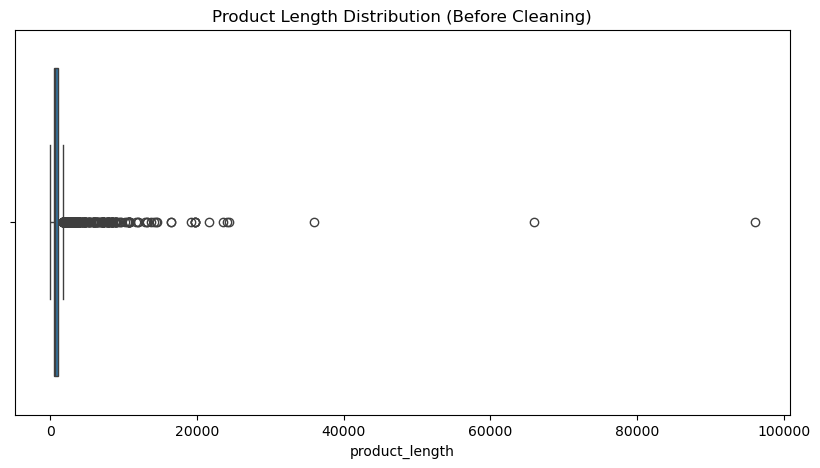

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=product["product_length"])
plt.title("Product Length Distribution (Before Cleaning)")

plt.savefig("product_length_before_cleaning.png", dpi=300)  
plt.show()

In [60]:
product = product[(product["product_length"] >= lower_bound) & (product["product_length"] <= upper_bound)]

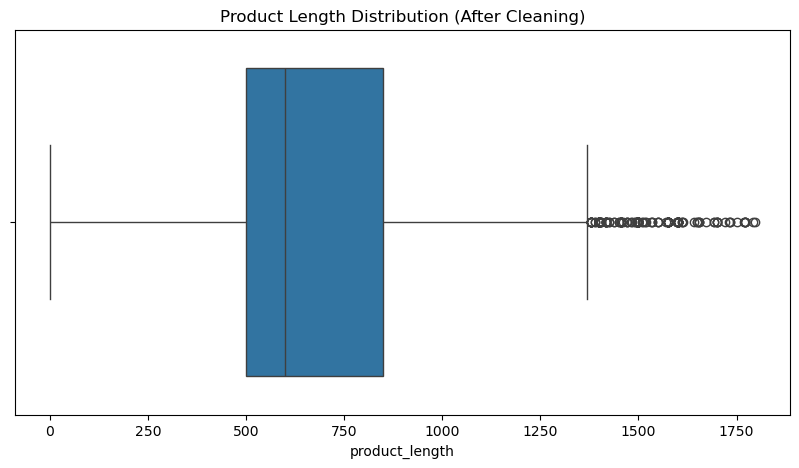

In [61]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=product["product_length"])
plt.title("Product Length Distribution (After Cleaning)")

plt.savefig("product_length_after_cleaning.png", dpi=300)  
plt.show()

In [62]:
product

,product_id,title,bullet_points,description,product_type_id,product_length
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",No description available,2755.0,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537.0,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996.0,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,No bullet points provided,No description available,6112.0,598.424000
5,2152929,HINS Metal Bucket Shape Plant Pot for Indoor &...,"[Simple and elegant, great for displaying indo...",HINS Brings you the most Elegant Looking Pot w...,5725.0,950.000000
...,...,...,...,...,...,...
3536,14245,Viper,No bullet points provided,No description available,123.0,437.007000
3559,322001,"The Impending Fate of Trinity College, Dublin,...",No bullet points provided,No description available,6104.0,614.000000
3560,773612,21 HeroÃ­nas Negras Excepcionais: HistÃ³ria de...,No bullet points provided,No description available,36.0,598.000000
3561,801695,Spider Dance,No bullet points provided,No description available,837.0,550.000000


In [63]:
product.to_csv('product.csv', index=False)

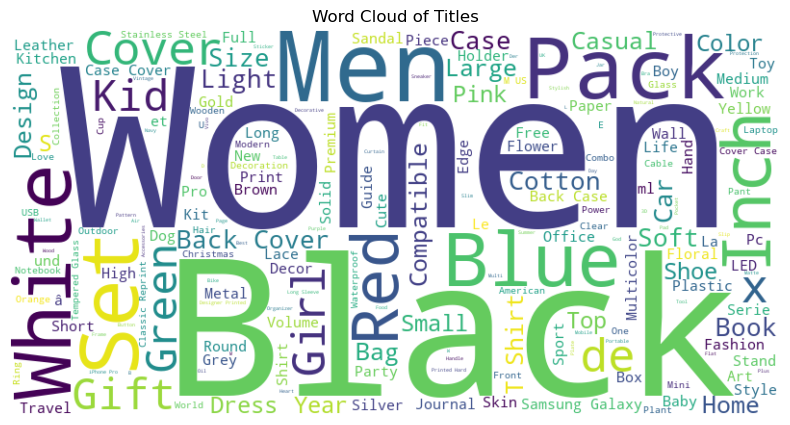

In [66]:
from wordcloud import WordCloud 

titles = " ".join(product["title"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(titles)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Titles")
plt.savefig("word_cloud_titles.png", dpi=300, bbox_inches="tight")  
plt.show()

In [70]:
df = pd.read_csv("Cleaned_product_data.csv",encoding='ISO-8859-1')

C:\Users\FOLAKEMI\AppData\Local\Temp\ipykernel_10904\567939713.py:9: UserWarning: Glyph 130 (\x82) missing from current font.
  plt.tight_layout()
C:\Users\FOLAKEMI\AppData\Local\Temp\ipykernel_10904\567939713.py:12: UserWarning: Glyph 130 (\x82) missing from current font.
  plt.savefig("first_10_shortened_titles_plot.png")
C:\Users\FOLAKEMI\New folder\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


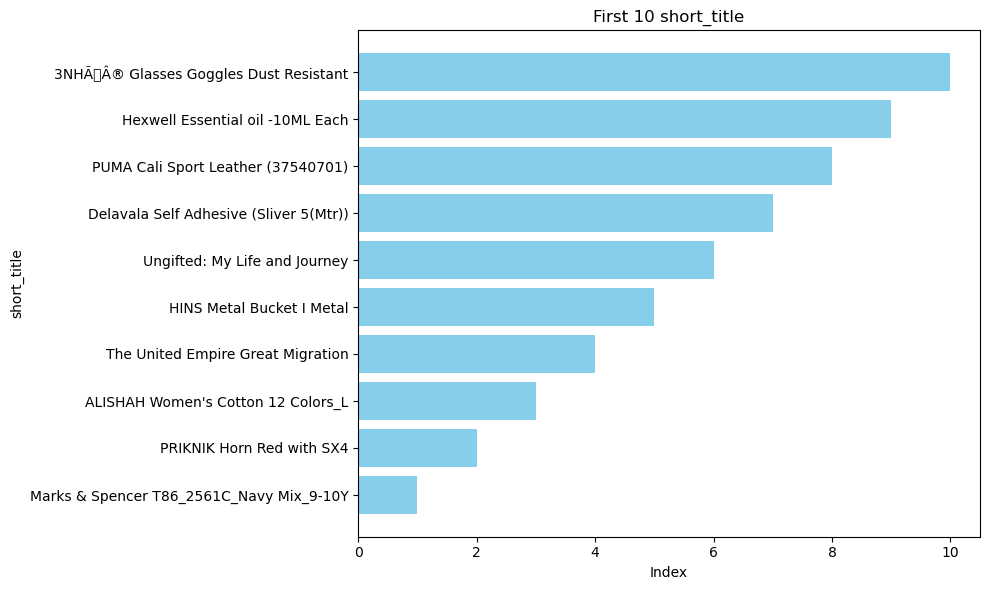

In [71]:
first_10_titles = df['short_title'].head(10)

# Plot the first 10 shortened titles
plt.figure(figsize=(10, 6))
plt.barh(first_10_titles, range(1, 11), color='skyblue')  # Horizontal bar chart
plt.title('First 10 short_title')
plt.xlabel('Index')
plt.ylabel('short_title')
plt.tight_layout()

# Save the plot to a local file path
plt.savefig("first_10_shortened_titles_plot.png")

# Show the plot
plt.show()

In [87]:
product.describe()

,product_id,product_type_id,product_length
count,3.177000e+03,3177.000000,3177.000000
mean,1.418176e+06,3778.253069,686.686917
std,8.865916e+05,3990.314233,351.679151
min,1.303000e+03,0.000000,1.000000
25%,6.291510e+05,123.000000,500.000000
50%,1.371534e+06,2842.000000,600.000000
75%,2.206782e+06,6124.000000,850.000000
max,2.999397e+06,13330.000000,1796.000000


In [88]:
product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3177 entries, 1 to 3562
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       3177 non-null   int64  
 1   title            3177 non-null   object 
 2   bullet_points    3177 non-null   object 
 3   description      3177 non-null   object 
 4   product_type_id  3177 non-null   float64
 5   product_length   3177 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 173.7+ KB
